## Se importan Librerias

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [20]:
# Creando el dataframe

df = pd.read_excel("FuelConsumptionCo2.xlsx")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230


In [21]:
# se eliminan las columnas categoricas
df.drop(['MODELYEAR','MAKE','MODEL','TRANSMISSION','VEHICLECLASS','FUELTYPE'], axis=1, inplace=True)
df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.4,4,9.9,7.0,8.6,33,200
1,3.5,6,12.6,9.4,11.2,25,263
2,2.0,4,11.0,8.6,9.9,29,232
3,2.0,4,11.3,9.1,10.3,27,242
4,2.0,4,11.2,8.0,9.8,29,230


No hay valores nulos en el dataframe


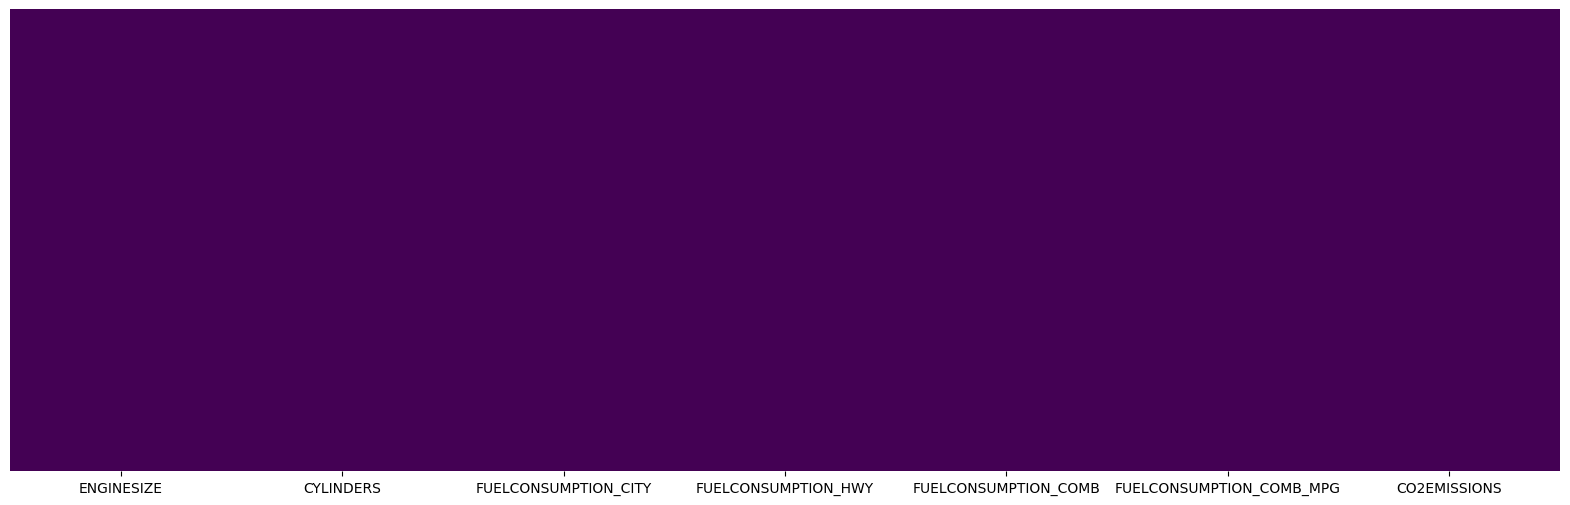

In [22]:
# Se Genera grafica para visualizar si hay valores nulos
# y dará un aviso si hay valores nulos

plt.figure(figsize=(20,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
if df.isnull().sum().sum() > 0:
    print("Hay valores nulos en el dataframe")
else:
    print("No hay valores nulos en el dataframe")

In [23]:
# Derterminando las variables donde buscaremos la relacion con CO2EMISSIONS
X = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']]
y = df['CO2EMISSIONS']

In [24]:
X

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB
0,2.4,4,9.9,7.0,8.6
1,3.5,6,12.6,9.4,11.2
2,2.0,4,11.0,8.6,9.9
3,2.0,4,11.3,9.1,10.3
4,2.0,4,11.2,8.0,9.8
...,...,...,...,...,...
940,2.0,4,10.7,7.7,9.4
941,2.0,4,10.5,8.1,9.4
942,2.0,4,11.0,8.7,9.9
943,2.0,4,11.5,8.4,10.1


In [25]:
y

0      200
1      263
2      232
3      242
4      230
      ... 
940    219
941    219
942    232
943    236
944    252
Name: CO2EMISSIONS, Length: 945, dtype: int64

In [26]:
# se divide el dataset en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [27]:
# Se crea el modelo de regresion lineal
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [38]:
# Se obtienen los coeficientes

print('Intercept: ', lm.intercept_)
print('Coefficients: ', lm.coef_)

Intercept:  24.36022227606793
Coefficients:  [0.17824767 4.65897998 7.22361917 5.89733356 5.57104232]


In [29]:
# Se realiza la prediccion con el modelo de regresion lineal
predictions = lm.predict(X_test)
predictions

array([320.27759338, 320.46767377, 348.97333105, 179.22865843,
       196.00794926, 246.27547979, 240.49984641, 332.22698905,
       326.88464766, 177.81656372, 271.4744786 , 225.12455187,
       322.1770447 , 260.81547577, 180.94314362, 265.25055674,
       170.92949905, 219.66131477, 337.08080088, 324.29308623,
       320.46767377, 341.18717685, 254.30938204, 219.66131477,
       340.75998078, 202.18956675, 369.62305913, 330.13426986,
       287.63437459, 151.91455181, 183.60029553, 180.94314362,
       237.63728305, 290.98792498, 312.69595714, 286.29156842,
       329.97983901, 314.12563338, 326.88464766, 217.68939142,
       298.62338262, 288.99007844, 228.4296589 , 184.613878  ,
       176.07999278, 246.54974537, 194.77198784, 344.5575989 ,
       160.86266366, 187.84141844, 289.94108683, 238.25058599,
       176.50144804, 258.41576202, 136.62076514, 310.53371017,
       344.47633026, 335.21734219, 305.9439825 , 386.33115074,
       198.83486308, 160.2550653 , 189.69490356, 305.44

In [30]:
# Se evalua el modelo de regresion lineal
from sklearn import metrics
from sklearn.metrics import r2_score

print("Valor de R2: ", r2_score(y_test, predictions))
print("Error absoluto medio: ", metrics.mean_absolute_error(y_test, predictions))
print("Error cuadratico medio: ", metrics.mean_squared_error(y_test, predictions))
print("Raiz del error cuadratico medio: ", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Valor de R2:  0.9751099414627364
Error absoluto medio:  6.848467139896128
Error cuadratico medio:  95.25073356748824
Raiz del error cuadratico medio:  9.759648229700097


## Regresion Ridge

In [31]:
# alpha = 0.05

from sklearn.linear_model import Ridge
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 

scaler = Normalizer()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicando Ridge
ridge = Ridge(alpha=0.05)
ridge.fit(X_train_scaled, y_train)
ridge_predictions = ridge.predict(X_test_scaled)

# Evaluando el modelo

print("Valor de R2: ", r2_score(y_test, ridge_predictions))
print("Error absoluto medio: ", mean_absolute_error(y_test, ridge_predictions))
print("Error cuadratico medio: ", mean_squared_error(y_test, ridge_predictions))
print("Raiz del error cuadratico medio: ", np.sqrt(mean_squared_error(y_test, ridge_predictions)))

Valor de R2:  0.31883138671221545
Error absoluto medio:  42.231516480863505
Error cuadratico medio:  2606.7359384339675
Raiz del error cuadratico medio:  51.05620372133016


## Definiendo el mejor alpha para Ridge

In [32]:
# Definiendo rango de valores para alpha

alpha_range = 10.**np.arange(-2, 3)
alpha_range

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [33]:
# Normalizar los datos

normalizer = Normalizer()
X_train_normalized = normalizer.fit_transform(X_train)
X_test_normalized = normalizer.transform(X_test)

# Ajusta el modelo RidgeCV
ridgecv = RidgeCV(alphas=alpha_range, scoring='neg_mean_squared_error')
ridgecv.fit(X_train_normalized, y_train)

# Probando el modelo RidgeCV para localizar el mejor valor de alpha
best_alpha = ridgecv.alpha_
print("Mejor valor de alpha: ", best_alpha)

Mejor valor de alpha:  0.01


In [34]:
# Prediciendo con el modelo RidgeCV con el mejor valor de alpha

ridgecv_predictions = ridgecv.predict(X_test_normalized)
print("Valor de R2: ", r2_score(y_test, ridgecv_predictions))
print("Error absoluto medio: ", mean_absolute_error(y_test, ridgecv_predictions))
print("Error cuadratico medio: ", mean_squared_error(y_test, ridgecv_predictions))
print("Raiz del error cuadratico medio: ", np.sqrt(mean_squared_error(y_test, ridgecv_predictions)))

Valor de R2:  0.32138341236718704
Error absoluto medio:  42.1079219017754
Error cuadratico medio:  2596.969697211386
Raiz del error cuadratico medio:  50.96047190922967
